# 🎯 E-Ticaret Funnel Analizi

**LinkedIn Tanımı:** "Satışa giden yol nerede tıkanıyor?"

Bu notebook'ta e-ticaret satış funnel'ini analiz ederek:
- 📊 Funnel aşamalarını görselleştireceğiz
- 🔍 Drop-off noktalarını tespit edeceğiz
- 📈 Conversion rate'leri hesaplayacağız
- 🎯 İyileştirme önerileri sunacağız

In [11]:
# Gerekli kütüphaneleri import edelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Türkçe karakter desteği
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.style.use('seaborn-v0_8')

print("✅ Kütüphaneler başarıyla import edildi!")

✅ Kütüphaneler başarıyla import edildi!


In [12]:
# Veri setlerini yükle
funnel_df = pd.read_csv('../data/raw/funnel_data.csv')
behavior_df = pd.read_csv('../data/raw/user_behavior.csv')
rfm_df = pd.read_csv('../data/raw/rfm_data.csv')

print("📊 Veri setleri yüklendi:")
print(f"- Funnel verisi: {len(funnel_df):,} kayıt")
print(f"- Kullanıcı davranışı: {len(behavior_df):,} kayıt")
print(f"- RFM analizi: {len(rfm_df):,} kayıt")

# Tarih sütununu datetime'a çevir
funnel_df['date'] = pd.to_datetime(funnel_df['date'])
behavior_df['date'] = pd.to_datetime(behavior_df['date'])
rfm_df['last_purchase_date'] = pd.to_datetime(rfm_df['last_purchase_date'])

📊 Veri setleri yüklendi:
- Funnel verisi: 365,823 kayıt
- Kullanıcı davranışı: 1,000 kayıt
- RFM analizi: 500 kayıt


In [13]:
# 1. FUNNEL ANALİZİ - Ana Funnel
print("🎯 FUNNEL ANALİZİ - Satışa Giden Yol")
print("=" * 50)

# Funnel aşamalarını hesapla
funnel_stages = {
    'Görüntüleme': funnel_df['page_view'].sum(),
    'Sepete Ekleme': funnel_df['add_to_cart'].sum(),
    'Ödeme Başlatma': funnel_df['start_checkout'].sum(),
    'Tamamlama': funnel_df['complete_purchase'].sum()
}

# Conversion rate'leri hesapla
conversion_rates = {}
previous_value = None
for stage, value in funnel_stages.items():
    if previous_value is not None:
        rate = (value / previous_value) * 100
        conversion_rates[stage] = rate
    previous_value = value

# Sonuçları yazdır
print("📊 Funnel Aşamaları:")
for stage, value in funnel_stages.items():
    print(f"{stage}: {value:,} kullanıcı")

print("\n📈 Conversion Rate'ler:")
for stage, rate in conversion_rates.items():
    print(f"{stage}: %{rate:.1f}")

# En büyük drop-off noktasını bul
min_conversion = min(conversion_rates.values())
bottleneck = [k for k, v in conversion_rates.items() if v == min_conversion][0]
print(f"\n🚨 En Büyük Drop-off Noktası: {bottleneck} (%{min_conversion:.1f})")

🎯 FUNNEL ANALİZİ - Satışa Giden Yol
📊 Funnel Aşamaları:
Görüntüleme: 365,823 kullanıcı
Sepete Ekleme: 109,831 kullanıcı
Ödeme Başlatma: 65,746 kullanıcı
Tamamlama: 52,588 kullanıcı

📈 Conversion Rate'ler:
Sepete Ekleme: %30.0
Ödeme Başlatma: %59.9
Tamamlama: %80.0

🚨 En Büyük Drop-off Noktası: Sepete Ekleme (%30.0)


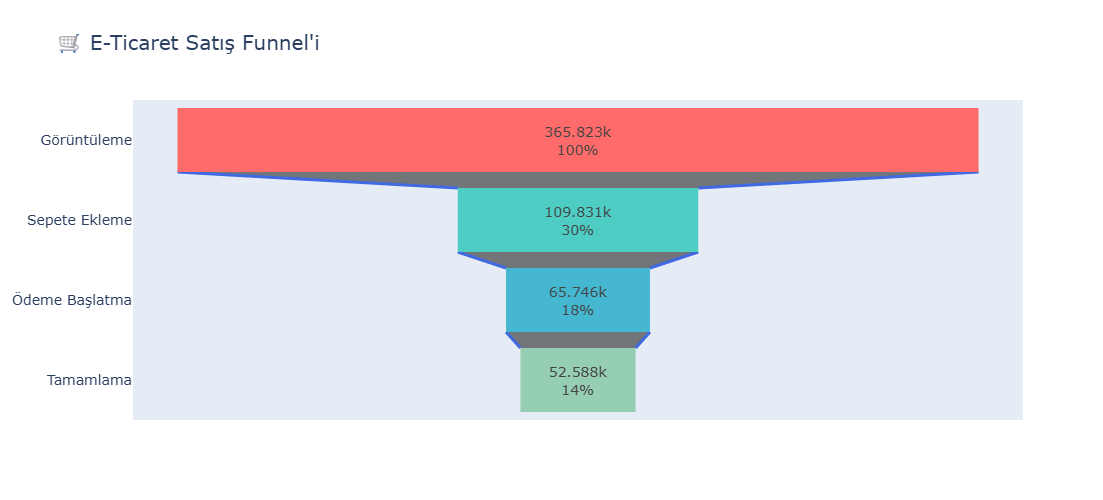

✅ Funnel görselleştirmesi tamamlandı!


In [14]:
# 2. FUNNEL GÖRSELLEŞTİRME
fig = go.Figure(go.Funnel(
    y=list(funnel_stages.keys()),
    x=list(funnel_stages.values()),
    textinfo="value+percent initial",
    textposition="inside",
    marker={"color": ["#FF6B6B", "#4ECDC4", "#45B7D1", "#96CEB4"]},
    connector={"line": {"color": "royalblue", "width": 3}}
))

fig.update_layout(
    title="🛒 E-Ticaret Satış Funnel'i",
    font=dict(size=14),
    showlegend=False,
    height=500
)

fig.show()

print("✅ Funnel görselleştirmesi tamamlandı!")

In [15]:
# 3. KATEGORİ BAZLI FUNNEL ANALİZİ
print("\n📊 KATEGORİ BAZLI FUNNEL ANALİZİ")
print("=" * 50)

# Kategori bazlı funnel analizi
category_funnel = funnel_df.groupby('category').agg({
    'page_view': 'sum',
    'add_to_cart': 'sum',
    'start_checkout': 'sum',
    'complete_purchase': 'sum'
}).reset_index()

# Conversion rate'leri hesapla
category_funnel['cart_conversion'] = (category_funnel['add_to_cart'] / category_funnel['page_view']) * 100
category_funnel['checkout_conversion'] = (category_funnel['start_checkout'] / category_funnel['add_to_cart']) * 100
category_funnel['purchase_conversion'] = (category_funnel['complete_purchase'] / category_funnel['start_checkout']) * 100
category_funnel['overall_conversion'] = (category_funnel['complete_purchase'] / category_funnel['page_view']) * 100

# En iyi ve en kötü kategorileri bul
best_category = category_funnel.loc[category_funnel['overall_conversion'].idxmax()]
worst_category = category_funnel.loc[category_funnel['overall_conversion'].idxmin()]

print(f"🏆 En İyi Kategori: {best_category['category']} (%{best_category['overall_conversion']:.1f} conversion)")
print(f"⚠️ En Kötü Kategori: {worst_category['category']} (%{worst_category['overall_conversion']:.1f} conversion)")

# Kategori bazlı conversion rate'leri göster
print("\n📈 Kategori Conversion Rate'leri:")
for _, row in category_funnel.iterrows():
    print(f"{row['category']}: %{row['overall_conversion']:.1f}")


📊 KATEGORİ BAZLI FUNNEL ANALİZİ
🏆 En İyi Kategori: Spor (%14.6 conversion)
⚠️ En Kötü Kategori: Elektronik (%14.2 conversion)

📈 Kategori Conversion Rate'leri:
Elektronik: %14.2
Ev & Yaşam: %14.5
Giyim: %14.2
Kitap: %14.4
Kozmetik: %14.2
Spor: %14.6


In [16]:
# 4. RFM ANALİZİ - Müşteri Segmentasyonu
print("\n👥 RFM ANALİZİ - Müşteri Segmentasyonu")
print("=" * 50)

# RFM segmentlerinin dağılımı
segment_counts = rfm_df['segment'].value_counts()
segment_percentages = (segment_counts / len(rfm_df)) * 100

print("📊 Müşteri Segmentleri:")
for segment, count in segment_counts.items():
    percentage = segment_percentages[segment]
    print(f"{segment}: {count} müşteri (%{percentage:.1f})")

# Segment bazlı ortalama değerler
segment_metrics = rfm_df.groupby('segment').agg({
    'recency_days': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).round(2)

print("\n📈 Segment Ortalamaları:")
print(segment_metrics)

# En değerli segment
champions = rfm_df[rfm_df['segment'] == 'Champions']
champions_value = champions['monetary'].sum()
total_value = rfm_df['monetary'].sum()
champions_percentage = (champions_value / total_value) * 100

print(f"\n💰 Champions segmenti toplam değerin %{champions_percentage:.1f}'ini oluşturuyor")


👥 RFM ANALİZİ - Müşteri Segmentasyonu
📊 Müşteri Segmentleri:
Loyal Customers: 324 müşteri (%64.8)
Champions: 87 müşteri (%17.4)
At Risk: 67 müşteri (%13.4)
Lost: 22 müşteri (%4.4)

📈 Segment Ortalamaları:
                 recency_days  frequency  monetary
segment                                           
At Risk                 56.45       3.03    201.20
Champions               12.47       4.39    382.50
Lost                   113.77       4.55    226.42
Loyal Customers         23.05       4.14    152.24

💰 Champions segmenti toplam değerin %32.9'ini oluşturuyor


In [17]:
# 5. KULLANICI DAVRANIŞI ANALİZİ
print("\n🎯 KULLANICI DAVRANIŞI ANALİZİ")
print("=" * 50)

# Session analizi
avg_session_duration = behavior_df['session_duration'].mean() / 60  # dakika
avg_pages_viewed = behavior_df['pages_viewed'].mean()
avg_bounce_rate = behavior_df['bounce_rate'].mean() * 100
return_visitor_rate = behavior_df['return_visitor'].mean() * 100

print(f"⏱️ Ortalama Session Süresi: {avg_session_duration:.1f} dakika")
print(f"📄 Ortalama Görüntülenen Sayfa: {avg_pages_viewed:.1f} sayfa")
print(f"📉 Ortalama Bounce Rate: %{avg_bounce_rate:.1f}")
print(f"🔄 Return Visitor Rate: %{return_visitor_rate:.1f}")

# Session süresi vs satın alma değeri korelasyonu
correlation = behavior_df['session_duration'].corr(behavior_df['purchase_value'])
print(f"\n📊 Session Süresi vs Satın Alma Korelasyonu: {correlation:.3f}")

# Return visitor analizi
return_visitors = behavior_df[behavior_df['return_visitor'] == 1]
new_visitors = behavior_df[behavior_df['return_visitor'] == 0]

avg_return_purchase = return_visitors['purchase_value'].mean()
avg_new_purchase = new_visitors['purchase_value'].mean()

print(f"💰 Return Visitor Ortalama Satın Alma: {avg_return_purchase:.2f} TL")
print(f"💰 New Visitor Ortalama Satın Alma: {avg_new_purchase:.2f} TL")


🎯 KULLANICI DAVRANIŞI ANALİZİ
⏱️ Ortalama Session Süresi: 5.1 dakika
📄 Ortalama Görüntülenen Sayfa: 7.9 sayfa
📉 Ortalama Bounce Rate: %19.2
🔄 Return Visitor Rate: %34.7

📊 Session Süresi vs Satın Alma Korelasyonu: 0.015
💰 Return Visitor Ortalama Satın Alma: 136.09 TL
💰 New Visitor Ortalama Satın Alma: 0.00 TL


In [18]:
# 6. ZAMAN SERİSİ ANALİZİ - Trend Analizi
print("\n📈 ZAMAN SERİSİ ANALİZİ - Trend Analizi")
print("=" * 50)

# Günlük conversion rate trendi
daily_funnel = funnel_df.groupby('date').agg({
    'page_view': 'sum',
    'add_to_cart': 'sum',
    'start_checkout': 'sum',
    'complete_purchase': 'sum'
}).reset_index()

daily_funnel['conversion_rate'] = (daily_funnel['complete_purchase'] / daily_funnel['page_view']) * 100

# Haftalık trend
daily_funnel['week'] = daily_funnel['date'].dt.isocalendar().week
weekly_trend = daily_funnel.groupby('week')['conversion_rate'].mean()

print(f"📊 Ortalama Günlük Conversion Rate: %{daily_funnel['conversion_rate'].mean():.2f}")
print(f"📈 En Yüksek Günlük Conversion: %{daily_funnel['conversion_rate'].max():.2f}")
print(f"📉 En Düşük Günlük Conversion: %{daily_funnel['conversion_rate'].min():.2f}")

# Mevsimsel analiz
daily_funnel['month'] = daily_funnel['date'].dt.month
monthly_trend = daily_funnel.groupby('month')['conversion_rate'].mean()

best_month = monthly_trend.idxmax()
worst_month = monthly_trend.idxmin()

print(f"\n🌞 En İyi Ay: {best_month}. ay (%{monthly_trend[best_month]:.2f} conversion)")
print(f"❄️ En Kötü Ay: {worst_month}. ay (%{monthly_trend[worst_month]:.2f} conversion)")


📈 ZAMAN SERİSİ ANALİZİ - Trend Analizi
📊 Ortalama Günlük Conversion Rate: %14.39
📈 En Yüksek Günlük Conversion: %18.41
📉 En Düşük Günlük Conversion: %11.38

🌞 En İyi Ay: 8. ay (%14.87 conversion)
❄️ En Kötü Ay: 6. ay (%14.07 conversion)


In [19]:
# 7. İŞ ÖNERİLERİ VE STRATEJİLER
print("\n🎯 İŞ ÖNERİLERİ VE STRATEJİLER")
print("=" * 50)

# Funnel iyileştirme önerileri
print("🚀 FUNNEL İYİLEŞTİRME ÖNERİLERİ:")
print(f"1. {bottleneck} aşamasında %{min_conversion:.1f} conversion rate'i artır")
print(f"2. {worst_category['category']} kategorisinde ürün çeşitliliği artır")
print(f"3. Return visitor oranını %{return_visitor_rate:.1f}'den %{return_visitor_rate + 5:.1f}'e çıkar")
print(f"4. Session süresini {avg_session_duration:.1f} dakikadan {avg_session_duration + 2:.1f} dakikaya çıkar")

# Müşteri segmentasyonu önerileri
print("\n👥 MÜŞTERİ SEGMENTASYONU ÖNERİLERİ:")
print(f"1. Champions segmentine özel VIP kampanyalar (%{champions_percentage:.1f} değer)")
print(f"2. At Risk müşterileri için win-back kampanyaları")
print(f"3. Lost müşterileri için re-engagement stratejileri")

# Zaman bazlı öneriler
print("\n📅 ZAMAN BAZLI ÖNERİLER:")
print(f"1. {worst_month}. ay için özel kampanyalar")
print(f"2. {best_month}. ay performansını diğer aylara yay")
print(f"3. Hafta sonu vs hafta içi farklı stratejiler")

# Teknik öneriler
print("\n⚙️ TEKNİK ÖNERİLER:")
print(f"1. Bounce rate'i %{avg_bounce_rate:.1f}'den %{avg_bounce_rate - 5:.1f}'e düşür")
print(f"2. Sayfa yükleme hızını optimize et")
print(f"3. Mobile-first tasarım iyileştirmeleri")
print(f"4. A/B testing ile conversion rate artırımı")


🎯 İŞ ÖNERİLERİ VE STRATEJİLER
🚀 FUNNEL İYİLEŞTİRME ÖNERİLERİ:
1. Sepete Ekleme aşamasında %30.0 conversion rate'i artır
2. Elektronik kategorisinde ürün çeşitliliği artır
3. Return visitor oranını %34.7'den %39.7'e çıkar
4. Session süresini 5.1 dakikadan 7.1 dakikaya çıkar

👥 MÜŞTERİ SEGMENTASYONU ÖNERİLERİ:
1. Champions segmentine özel VIP kampanyalar (%32.9 değer)
2. At Risk müşterileri için win-back kampanyaları
3. Lost müşterileri için re-engagement stratejileri

📅 ZAMAN BAZLI ÖNERİLER:
1. 6. ay için özel kampanyalar
2. 8. ay performansını diğer aylara yay
3. Hafta sonu vs hafta içi farklı stratejiler

⚙️ TEKNİK ÖNERİLER:
1. Bounce rate'i %19.2'den %14.2'e düşür
2. Sayfa yükleme hızını optimize et
3. Mobile-first tasarım iyileştirmeleri
4. A/B testing ile conversion rate artırımı


In [20]:
# 8. ÖZET VE KPI'LAR
print("\n📊 ÖZET VE KPI'LAR")
print("=" * 50)

# Ana KPI'lar
overall_conversion = (funnel_stages['Tamamlama'] / funnel_stages['Görüntüleme']) * 100
avg_order_value = rfm_df['monetary'].mean()
customer_lifetime_value = avg_order_value * rfm_df['frequency'].mean()

print("🎯 ANA KPI'LAR:")
print(f"• Genel Conversion Rate: %{overall_conversion:.2f}")
print(f"• Ortalama Sipariş Değeri: {avg_order_value:.2f} TL")
print(f"• Müşteri Yaşam Boyu Değeri: {customer_lifetime_value:.2f} TL")
print(f"• Return Visitor Rate: %{return_visitor_rate:.1f}")
print(f"• Ortalama Session Süresi: {avg_session_duration:.1f} dakika")

print("\n🏆 BAŞARI METRİKLERİ:")
print(f"• En İyi Kategori: {best_category['category']} (%{best_category['overall_conversion']:.1f})")
print(f"• En İyi Ay: {best_month}. ay (%{monthly_trend[best_month]:.2f})")
print(f"• Champions Segmenti: %{champions_percentage:.1f} değer")

print("\n🚨 İYİLEŞTİRME ALANLARI:")
print(f"• En Büyük Drop-off: {bottleneck} (%{min_conversion:.1f})")
print(f"• En Kötü Kategori: {worst_category['category']} (%{worst_category['overall_conversion']:.1f})")
print(f"• En Kötü Ay: {worst_month}. ay (%{monthly_trend[worst_month]:.2f})")

print("\n✅ Bu analiz LinkedIn tanımına uygun kapsamlı bir e-ticaret funnel analizi sunuyor!")


📊 ÖZET VE KPI'LAR
🎯 ANA KPI'LAR:
• Genel Conversion Rate: %14.38
• Ortalama Sipariş Değeri: 202.13 TL
• Müşteri Yaşam Boyu Değeri: 818.61 TL
• Return Visitor Rate: %34.7
• Ortalama Session Süresi: 5.1 dakika

🏆 BAŞARI METRİKLERİ:
• En İyi Kategori: Spor (%14.6)
• En İyi Ay: 8. ay (%14.87)
• Champions Segmenti: %32.9 değer

🚨 İYİLEŞTİRME ALANLARI:
• En Büyük Drop-off: Sepete Ekleme (%30.0)
• En Kötü Kategori: Elektronik (%14.2)
• En Kötü Ay: 6. ay (%14.07)

✅ Bu analiz LinkedIn tanımına uygun kapsamlı bir e-ticaret funnel analizi sunuyor!
